### Notebook imports and Packages

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import sys
print(sys.version)

%matplotlib inline

3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]


### Example 1 - A simple Cost Function
### $$f(x) = x^2 + x + 1$$

In [151]:
def f(x):
    return x**2 + x + 1

In [152]:
#using np to generate x_1 value
#generate 100 value from -3 to 3 with equal spacing
x_1 = np.linspace(start=-3, stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

<function matplotlib.pyplot.show(close=None, block=None)>

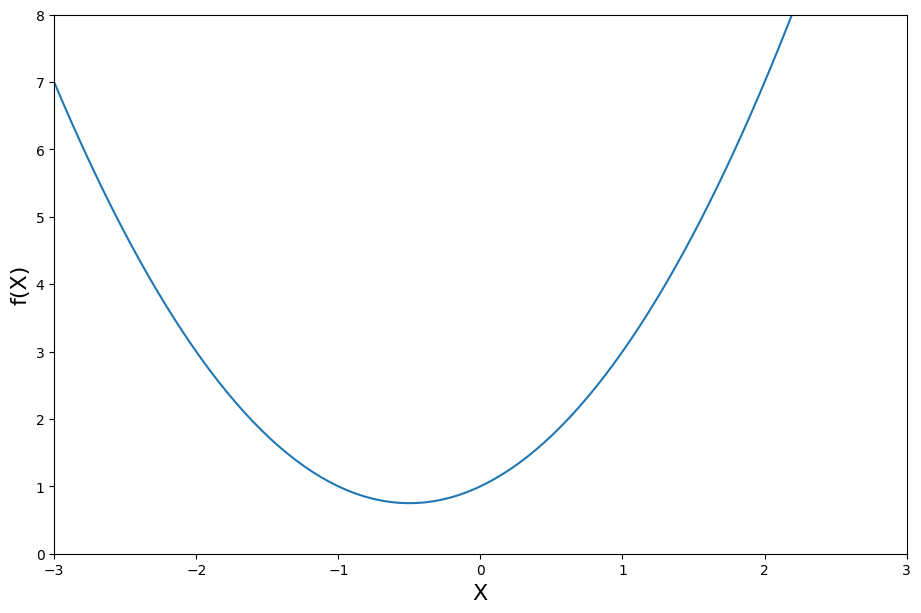

In [153]:
plt.figure(figsize = (11,7))
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(X)', fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show

### Slope and Derivatives
Create a python function for the derivative of f(x) called df(x)

In [154]:
def df(x):
    return 2*x + 1

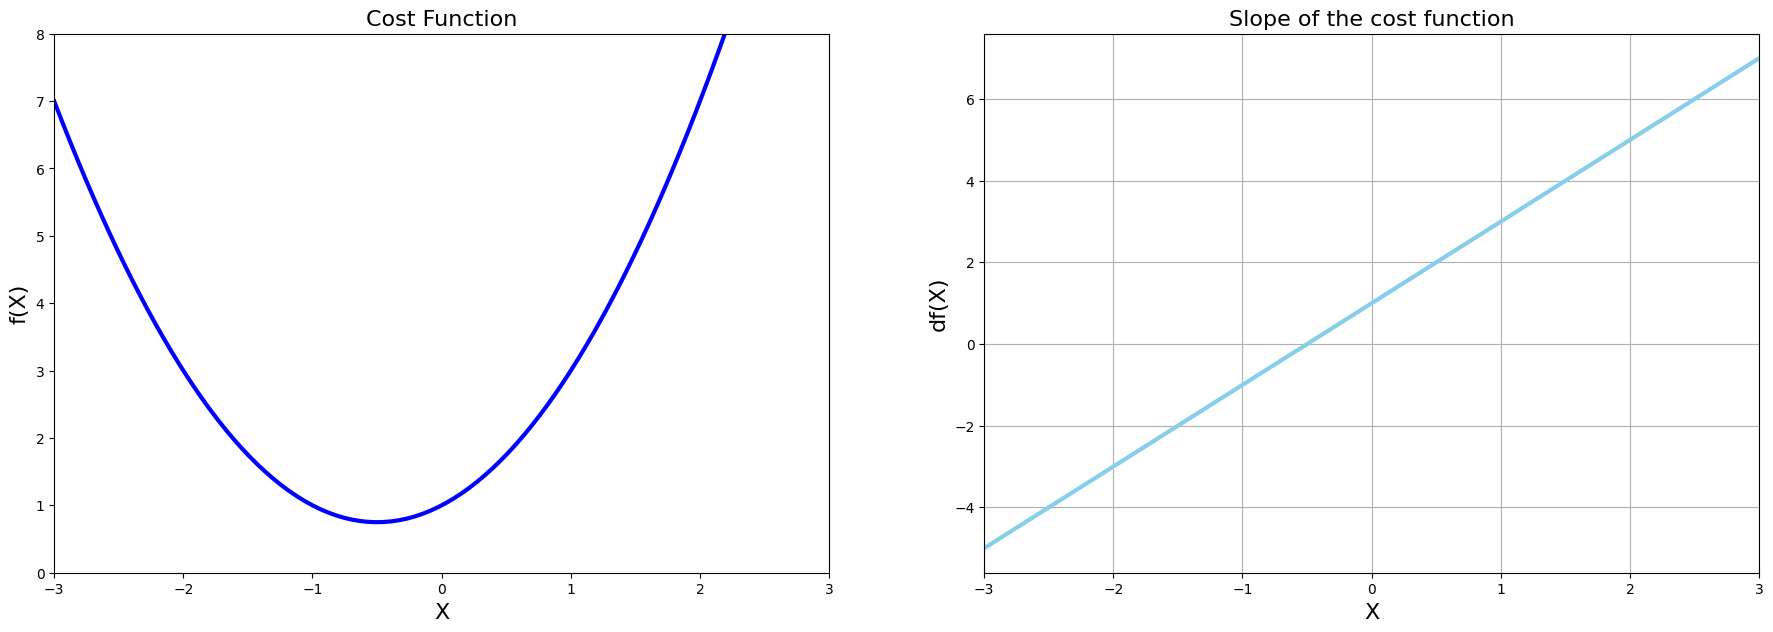

In [155]:
plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(X)', fontsize = 16)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(X)', fontsize = 16)
plt.xlim(-3,3)
plt.grid()
plt.plot(x_1,df(x_1), color ='skyblue', linewidth = 3)

plt.show()

### Python Loops and Gradient Descent

In [156]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
iteration = 0

x_list = [new_x]
slope_list = [df(new_x)]

print(type(x_list))

while True: 
    previous_x = new_x
    gradient = df(previous_x) # calculating slope
    new_x = previous_x - step_multiplier * gradient # Updating X value

    step_size = abs(new_x - previous_x)
    #print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('number of iterations: ', iteration)
        break

    iteration = iteration + 1

print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is', f(new_x))

<class 'list'>
number of iterations:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is 0.7500000015970362


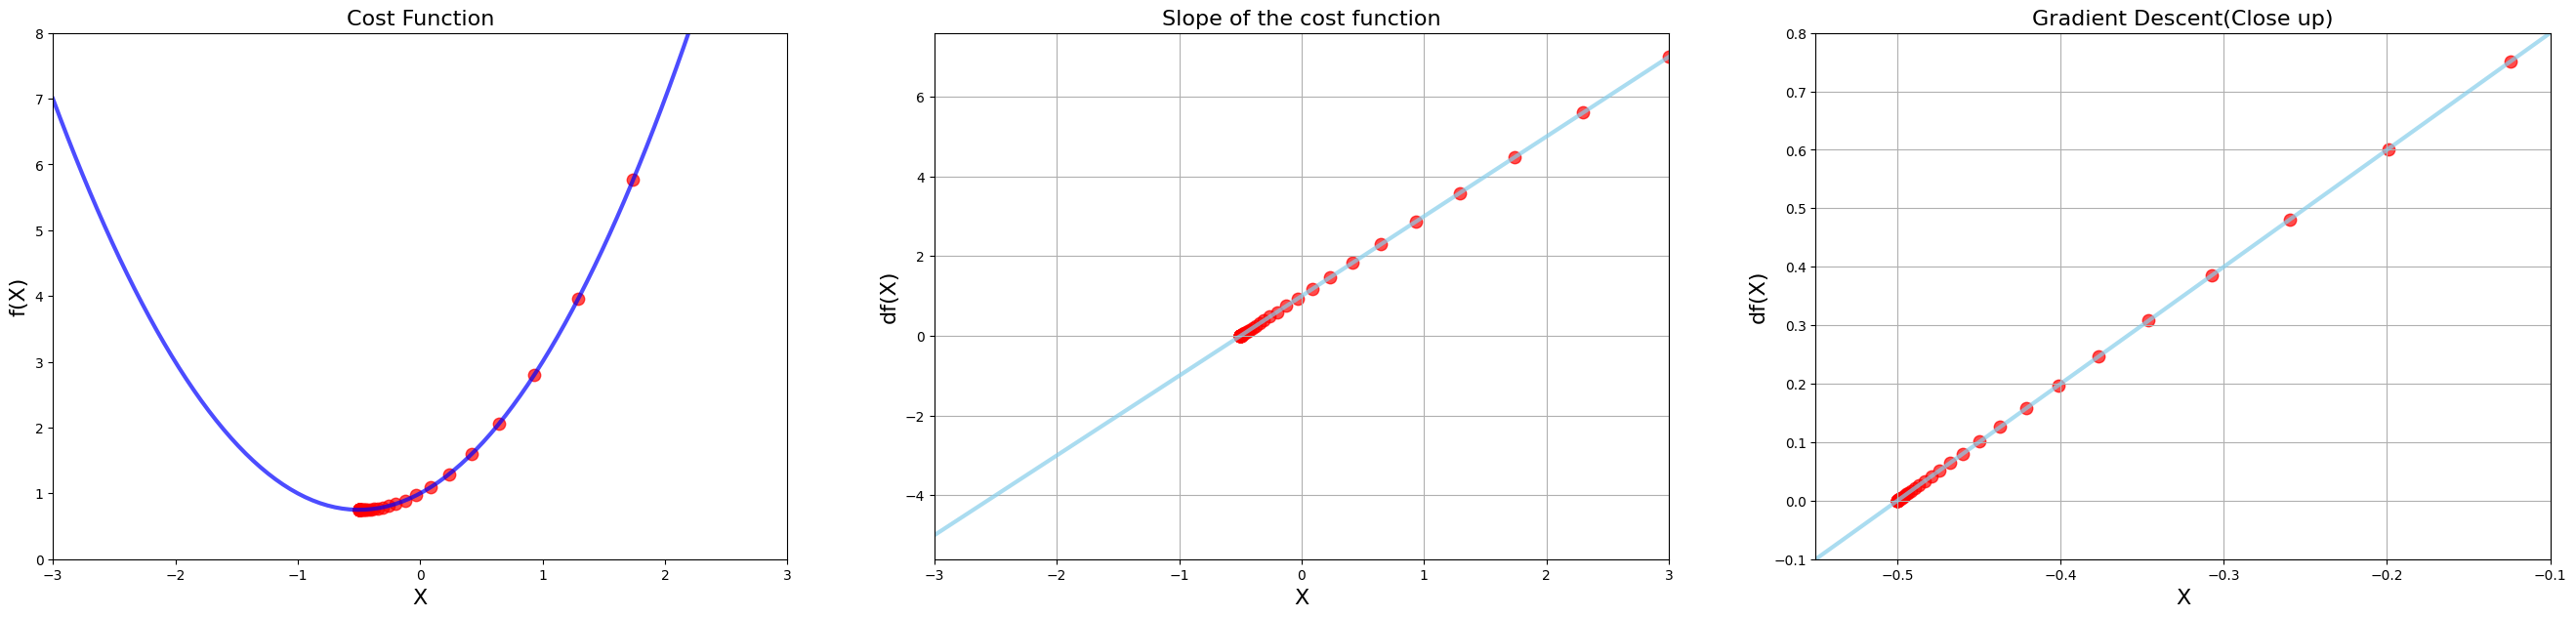

In [157]:
# Superimpose重叠 the gradient descent calculations on plot

plt.figure(figsize=(33,7))

# 1 Chart: Cost Function
plt.subplot(1,3,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(X)', fontsize = 16)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 3, alpha = 0.7)

# 1 Chart: Superimpose
gradient_x_list = np.array(x_list) # list can not perform **(power) operation, so conversion is required
plt.scatter(x_list,f(gradient_x_list), color = 'red', s = 80, alpha= 0.7)

# 2 Chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(X)', fontsize = 16)
plt.xlim(-3,3)
plt.grid()
plt.plot(x_1,df(x_1), color ='skyblue', linewidth = 3, alpha = 0.7)

# 2 Chart: Superimpose
plt.scatter(x_list, slope_list, color = 'red', s = 80, alpha= 0.7)

# 3 Chart: Derivative (close up)
plt.subplot(1,3,3)
plt.title('Gradient Descent(Close up)', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(X)', fontsize = 16)
plt.xlim(-0.55 , -0.1) 
plt.ylim(-0.1 , 0.8)
plt.grid()
plt.plot(x_1,df(x_1), color ='skyblue', linewidth = 3, alpha = 0.7)

# 3 Chart: Superimpose
plt.scatter(x_list, slope_list, color = 'red', s = 80, alpha= 0.7)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess and Advanced Functions
### $$g(x) = x^4 - x^2 + 5$$

In [158]:
# Generating some data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

In [159]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

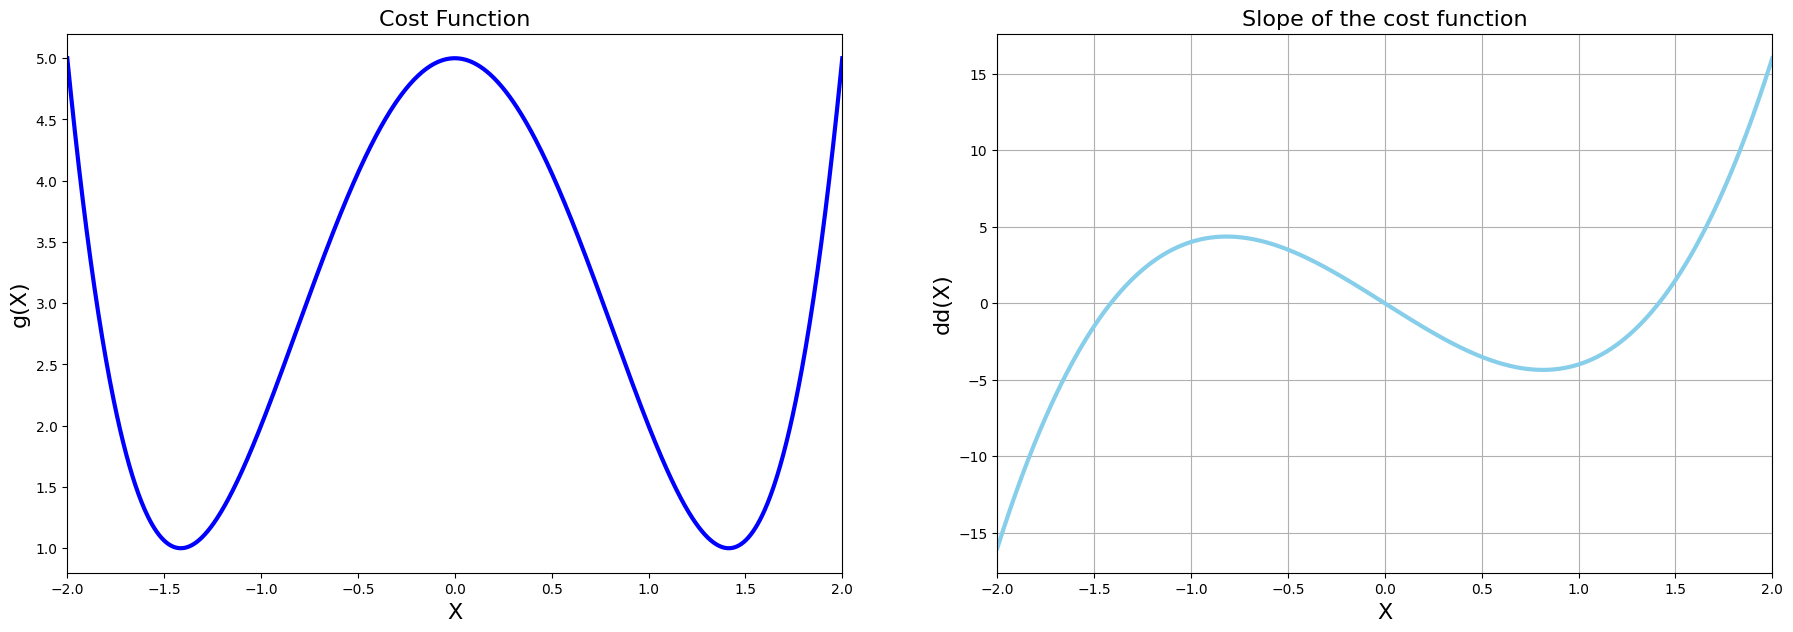

In [160]:
plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2,2)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dd(X)', fontsize = 16)
plt.xlim(-2,2)
plt.grid()
plt.plot(x_2,dg(x_2), color ='skyblue', linewidth = 3)

plt.show()

### Gradient Descent as a Python Function

In [161]:
def gradient_descent(derivative_func, initial_guess, learning_rate = 0.02, precision = 0.001, max_iter = 300):
    new_x = initial_guess
    multiplier = learning_rate

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = precision + 1
    iter_num = 1

    while step_size > precision:        
        if iter_num > max_iter:
            break 

        previous_x = new_x
        gradient = derivative_func(previous_x) # calculating slope
        new_x = previous_x - multiplier * gradient # Updating X value

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        iter_num = iter_num + 1
    
    return new_x, x_list, slope_list

In [162]:
local_min, x_list2, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, learning_rate=0.01, precision=0.0001)

print('Local min occurs at:', local_min)
print('Number of iterations:', len(x_list2))

Local min occurs at: 1.4137636556157256
Number of iterations: 56


In [163]:
local_min, x_list2, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, learning_rate=0.02, precision=0.001)

print('Local min occurs at:', local_min)
print('Number of iterations:', len(x_list2))

Local min occurs at: -1.4122375085019094
Number of iterations: 23


What we are doing below is called Batch Gradient Descent, you can observe that:
1. picking a random initial guess will affect the result of getting local min
2. without know the cost function, you can't determine local or global min
3. without know the cost function, you can't find the number of local mins

Stochastic Gradient Descent may solve the problem<br>

NOTE: Every Graident Descent has different pros and cons, and its your responsibility to pick the right gradient descent for certain application or situation

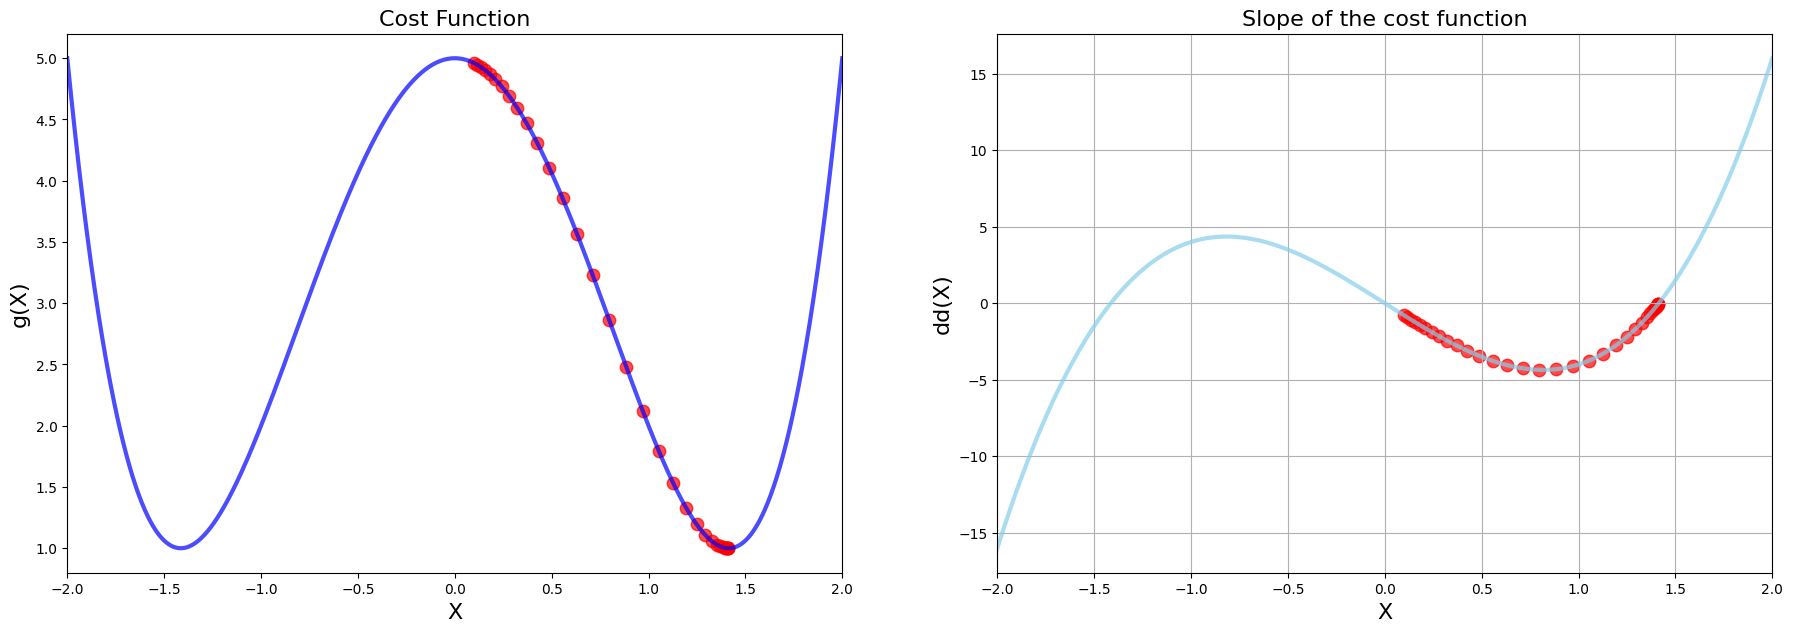

In [164]:
# Calling gradient descent function
local_min, x_list2, slope_list2 = gradient_descent(derivative_func=dg, initial_guess=0.1, learning_rate=0.02, precision=0.001)


plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2,2)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3, alpha = 0.7)

plt.scatter(x_list2,g(np.array(x_list2)), color ='red', s = 80, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dd(X)', fontsize = 16)
plt.xlim(-2,2)
plt.grid()
plt.plot(x_2,dg(x_2), color ='skyblue', linewidth = 3, alpha = 0.7)
plt.scatter(x_list2, slope_list2, color ='red', s = 80, alpha=0.7)

plt.show()

### Examle 3 - Divergence, overflow and Python Tuples

### $$h(x) = x^5 - 2x^4 + 2$$

In [165]:
# Generating data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

In [166]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

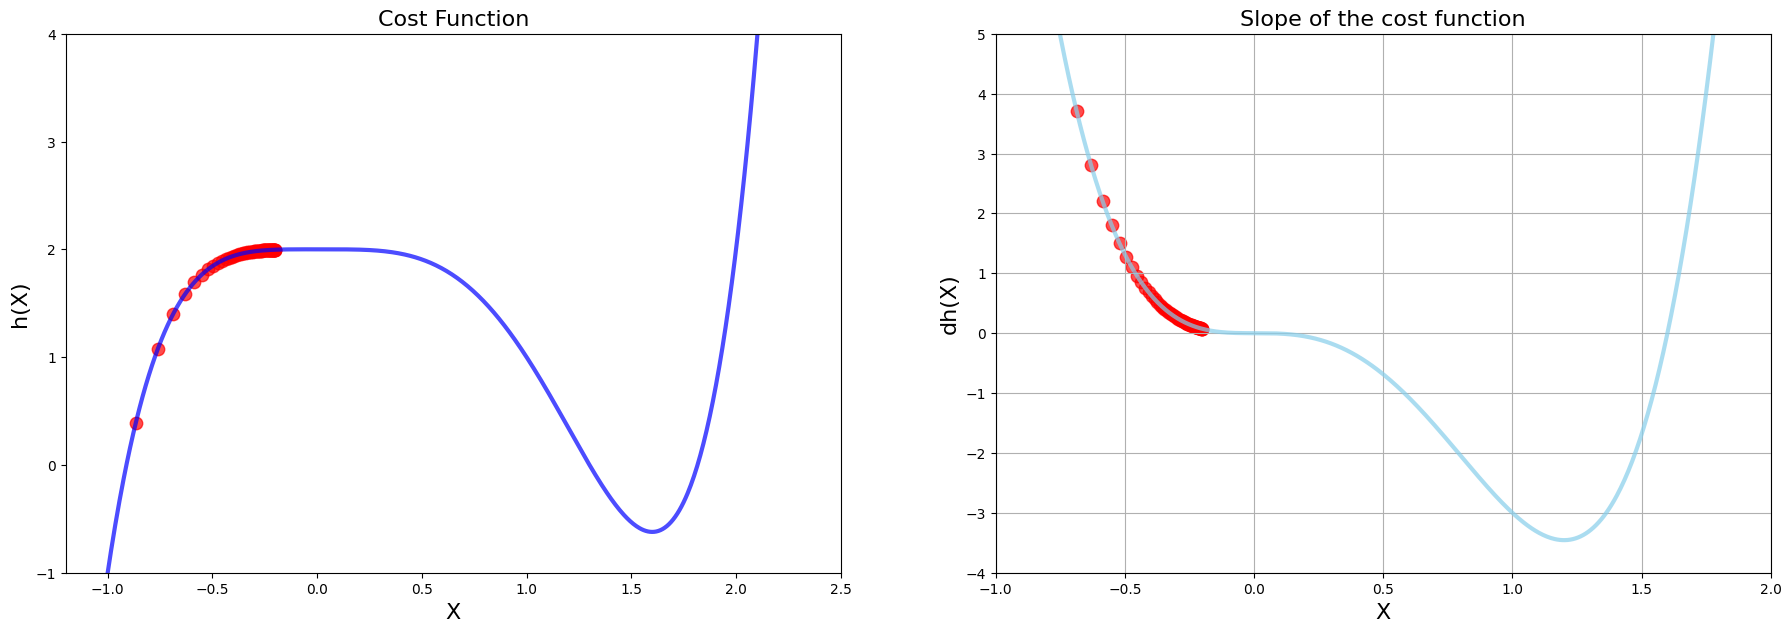

Local minimum occurs at: -2071072.4470816324
Slope or df(x) value at this point is: 9.199230561666396e+25
Cost at this min point is -3.810455326061589e+31
Number of iterations: 71


In [173]:

# Calling gradient descent function
local_min3, x_list3, slope_list3 = gradient_descent(derivative_func=dh, initial_guess=-0.2, learning_rate=0.02, precision=0.001, max_iter= 70)


plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-1.2 , 2.5)
plt.ylim(-1, 4)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(X)', fontsize = 16)
plt.plot(x_3,h(x_3), color = 'blue', linewidth = 3, alpha = 0.7)

plt.scatter(x_list3,h(np.array(x_list3)), color ='red', s = 80, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(X)', fontsize = 16)
plt.xlim(-1 , 2)
plt.ylim(-4,5)
plt.grid()
plt.plot(x_3,dh(x_3), color ='skyblue', linewidth = 3, alpha = 0.7)
plt.scatter(x_list3, slope_list3, color ='red', s = 80, alpha=0.7)

plt.show()

print('Local minimum occurs at:', local_min3)
print('Slope or df(x) value at this point is:', dh(local_min3))
print('Cost at this min point is', h(local_min3))
print('Number of iterations:', len(x_list3))

### Learning Rate
Higher learning rate tends to have a better efficiency<br>
However, if you picked too high learning rate, issue still occurs<br>
Picking a learning rate could be a time investing topic and it is meaningful to learn some skill regarding how to pick learning rate

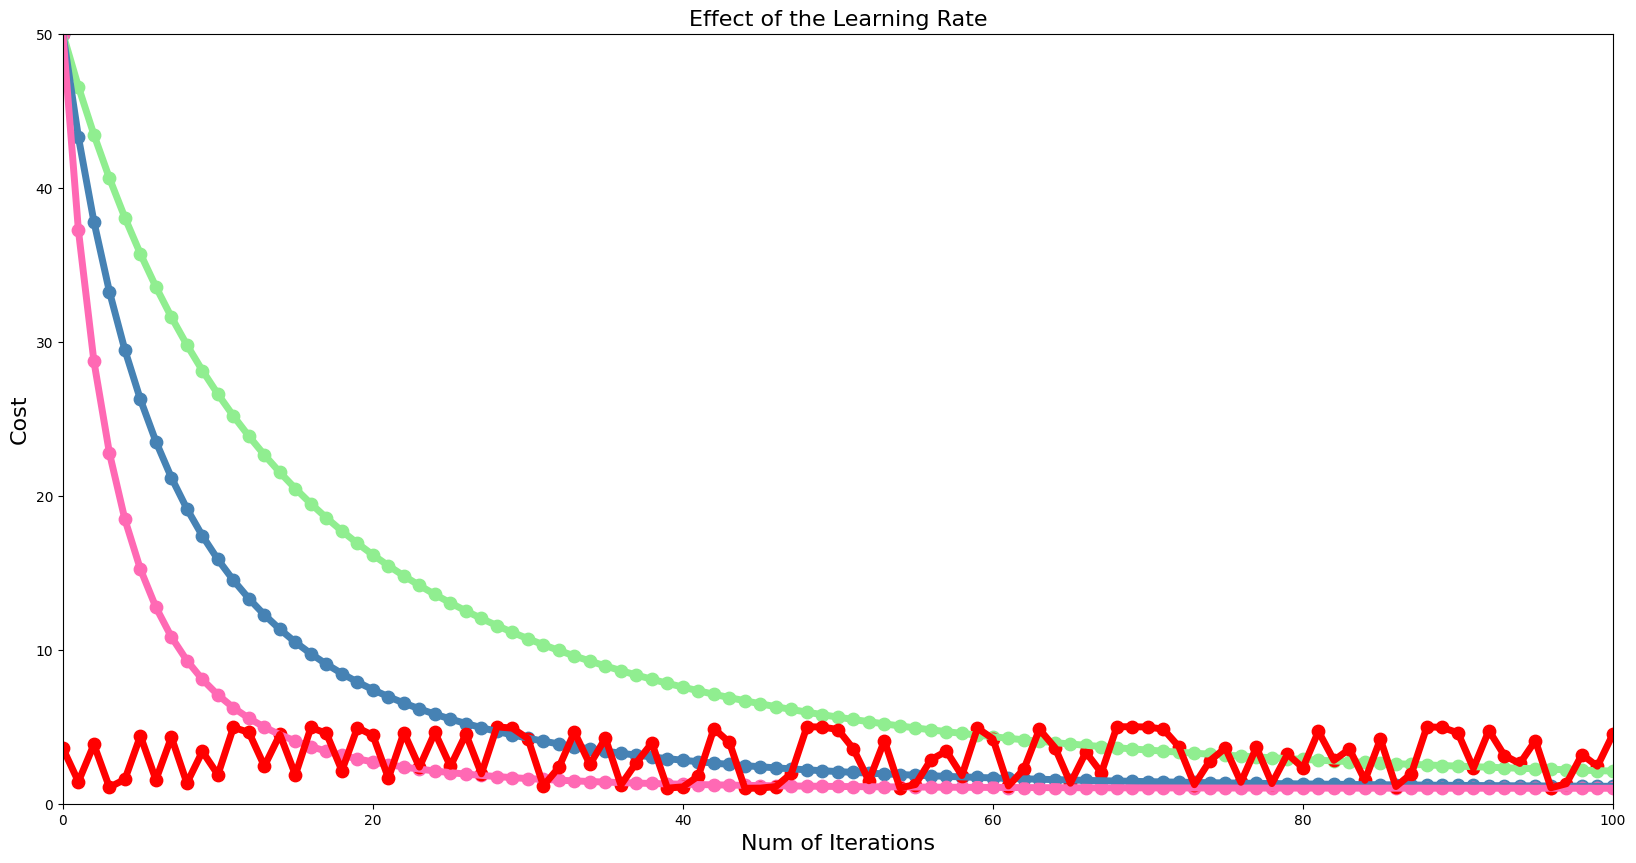

In [179]:

# Calling gradient descent function
n = 100
#low_gamma is a tuples(structure in C)
# Low_gamma[0] = local_min; low_gamma[1] = x_list; low_gamma[2] = slope_list
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, learning_rate=0.0005, precision=0.0001, max_iter= n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, learning_rate=0.001, precision=0.0001, max_iter= n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, learning_rate=0.002, precision=0.0001, max_iter= n)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, learning_rate=0.25, precision=0.0001, max_iter= n)

plt.figure(figsize=(20,10))
plt.title('Effect of the Learning Rate', fontsize = 16)
plt.xlim(0, n)
plt.ylim(0 , 50)
plt.xlabel('Num of Iterations', fontsize = 16)
plt.ylabel('Cost', fontsize = 16)

# Chart: Low gamma value to learning rate
low_values = np.array(low_gamma[1])
iteration_list = list(range(0, n+1))
plt.plot(iteration_list, g(low_values), color = 'lightgreen', linewidth = 5)
plt.scatter(iteration_list, g(low_values), color = 'lightgreen', s = 80)

# Chart: mid gamma value to learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', linewidth = 5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', s = 80)

# Chart: high gamma value to learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', linewidth = 5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', s = 80)

# Chart: insane gamma value to learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color = 'red', linewidth = 5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color = 'red', s = 80)

plt.show()

### Example 4 - Data Viz with 3D Charts

### $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

minimise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$